In [1]:
import numpy as np

# some_file.py
import sys
sys.path.insert(0, '../src/easyesn/')

In [2]:
from easyesn.optimizers import GradientOptimizer
from easyesn import PredictionESN
from easyesn.optimizers import GridSearchOptimizer
from easyesn import helper as hlp
import matplotlib.pyplot as plt


Using Numpy backend.


In [22]:
inputLength = 10000
trainingLength = int(inputLength*0.7)
data = np.linspace(0, 10*np.pi, inputLength).reshape(-1,1)

inputData = np.sin(data)
outputData = np.cos(data)

inputDataTraining = inputData[:trainingLength]
inputDataValidation = inputData[trainingLength:]

outputDataTraining = outputData[:trainingLength]
outputDataValidation = outputData[trainingLength:]

## Generative task

In [23]:
esn = PredictionESN(n_input=0, n_output=1, n_reservoir=50, leakingRate=0.2, regressionParameters=[1e-2], solver="lsqr", feedback=True)

In [24]:
esn.fit(None, inputDataTraining, transientTime=100, verbose=1)

100% (7000 of 7000) |#####################| Elapsed Time: 0:00:00 Time: 0:00:00


0.00024321963551316608

In [25]:
generation = esn.generate(len(inputDataValidation), None)

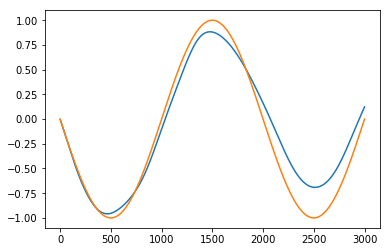

In [26]:
plt.plot(generation[0, :])
plt.plot(inputDataValidation)
plt.show()

In [12]:
print(generation.shape)

(1, 1000)


In [27]:
min(2, 3)

2